# Table of Content

- Basic data exploration
- Types of Variables
- Univariate Analysis
  - Measures of Central Tendency
  - Measures of dispersion
- Univariate Analysis using Visualization
  - Categorical Variable
  - Numerical Variable
    

## Data Analysis in Python

### Dataset - Honey Production

Source Credit : https://www.kaggle.com/jessicali9530/honey-production

#### Context
In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component to American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees causing the remaining hive colony to collapse. Speculation to the cause of this disorder points to hive diseases and pesticides harming the pollinators, though no overall consensus has been reached. Twelve years later, some industries are observing recovery but the American honey industry is still largely struggling. The U.S. used to locally produce over half the honey it consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insight into honey production supply and demand in America by state from 1998 to 2012.

#### Attribute Information
  - numcol: Number of honey producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies which did not survive the entire year
  - yieldpercol: Honey yield per colony. Unit is pounds
  - totalprod: Total production (numcol x yieldpercol). Unit is pounds
  - stocks: Refers to stocks held by producers. Unit is pounds
  - priceperlb: Refers to average price per pound based on expanded sales. Unit is dollars.
  - prodvalue: Value of production (totalprod x priceperlb). Unit is dollars.
  - Other useful information: Certain states are excluded every year (ex. CT) to avoid disclosing data for individual operations. Due to rounding, total colonies multiplied by total yield may not equal production. Also, summation of states will not equal U.S. level value of production.

####  Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Load the dataset

In [2]:
df = pd.read_csv('honeyproduction.csv')
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


## 1. Explore the data

In [3]:
df.shape # shape method can be used to check the exact shape of data

(626, 8)

In [4]:
df.nunique() #nuniques() function provides the total number of uniques values present in each feature

state           44
numcol         148
yieldpercol     95
totalprod      517
stocks         500
priceperlb     210
prodvalue      589
year            15
dtype: int64

In [ ]:
df.columns # 'columns' method provides name of each column

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')

In [5]:
df.info() #info() function gives information about each feature such as no. of samples(rows), no. of columns along with their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


- There are 626 entries and 8 columns
- There is one object type column
- There are no null values
----------------------

## 2. Types of Variables

#### 2.1 Numerical variables
- if it can assume an infinite number of real values within a given interval. 

In [6]:
df.select_dtypes(include=np.number).head() #shows only columns with numerical attributes

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [ ]:
df.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
numcol,626.0,6.028435e+04,9.107709e+04,2000.00,9000.0000,26000.00,63750.00,510000.00
yieldpercol,626.0,6.200958e+01,1.945875e+01,19.00,48.0000,60.00,74.00,136.00
totalprod,626.0,4.169086e+06,6.883847e+06,84000.00,475000.0000,1533000.00,4175250.00,46410000.00
stocks,626.0,1.318859e+06,2.272964e+06,8000.00,143000.0000,439500.00,1489500.00,13800000.00
priceperlb,626.0,1.409569e+00,6.385989e-01,0.49,0.9325,1.36,1.68,4.15
prodvalue,626.0,4.715741e+06,7.976110e+06,162000.00,759250.0000,1841500.00,4703250.00,69615000.00
year,626.0,2.004864e+03,4.317306e+00,1998.00,2001.0000,2005.00,2009.00,2012.00


- Here, year can be considered as a discrete feature. It ranges from 1998 to 2012 and can take only certain values.
- And all other features can be considered as continuous features

- Minimum number of honey producing colonies is 2000 and maximum is 51000
- Honey yield per colony ranges from 19 pounds to 136 pounds
- The average honey yeild per colony is around 62 pounds
- The minimum average price per pound is 0.49 dollars and maximum is 4.15 dollars

#### 2.2 Categorical Variables
- qualitative in nature and can't be measured.

In [ ]:
df.select_dtypes(include='object').head()

,state
0,AL
1,AZ
2,AR
3,CA
4,CO


In [ ]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
state,626,44,AL,15


- Here, state is nominal feature as there is no inherent order

- We have 44 unique states.
- Most of the instances are having the state as AL

## 3. Univariate Analysis

### 3.1 Measures of Central Tendency

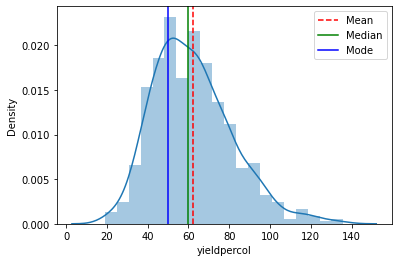

Mean: 62.00958466453674
Median: 60.0
Mode: 50


In [ ]:
##Let us understand the distribution of the column 'yieldpercol'
mean=df['yieldpercol'].mean()
median=df['yieldpercol'].median()
mode=df['yieldpercol'].mode().values[0]

sns.distplot(df['yieldpercol'])
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label='Median')
plt.axvline(mode, color='b', linestyle='-', label='Mode')
plt.legend()
plt.show()
print('Mean:',mean)
print("Median:",median)
print('Mode:',mode)

----------------------
### 3.2 Measures of dispersion


- Variance: helps in understanding the degree of spread in your data.

In [ ]:
## Calculating the variance of the column 'totalprod'
df['totalprod'].var()

47387346094946.96

- Standard Deviation: helps in understanding of how dispersed the data is in relation to the mean

In [ ]:
## Standard Deviation
df['totalprod'].std()

6883846.751268288

- Range: Largest value- smallest value in a set of data

In [ ]:
## Range
print('largest value:',df['totalprod'].max())
print('smallest value:',df['totalprod'].min())
print('range:',df['totalprod'].max()-df['totalprod'].min())

largest value: 46410000.0
smallest value: 84000.0
range: 46326000.0


- Interquartile range: Q3-Q1 (3rd quartile - first quartile)



In [ ]:
## IQR
Q1 = df['totalprod'].quantile(0.25)
Q2 = df['totalprod'].quantile(0.50)
Q3 = df['totalprod'].quantile(0.75)
IQR = Q3-Q1
print('Q1:',Q1)
print('Q2:',Q2)
print('Q3:',Q3)
print('~'*15)
print('IQR:',IQR)

Q1: 475000.0
Q2: 1533000.0
Q3: 4175250.0
~~~~~~~~~~~~~~~
IQR: 3700250.0


## 4. Univariate Analysis Using Visualization

### 4.1 Categorical Variable

#### Lets understand the percentage of distribution of the data in each year

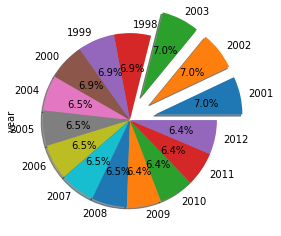

In [44]:
df['year'].value_counts().plot(kind='pie',autopct='%1.1f%%', explode=[0.3,0.3,0.3,0,0,0,0,0,0,0,0,0,0,0,0],shadow=True)
plt.show()

### 4.2 Numerical Variable

#### Let us understand the distribution of the variable "priceperlb"

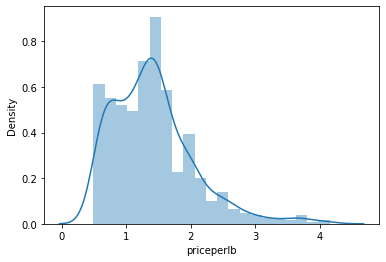

In [ ]:
sns.distplot(df['priceperlb'])
plt.show()

- We can observe from the above distribution plot, the priceperlb value is ranging from 0 to 4.5 dollars
- And also the we can observe that the most of the records fall in between 0.5 to 1.5 dollars range

--------------
## Happy Learning :)
--------------